<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Base/AI_HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

Для воспроизводимости результатов для проверяющего

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [6]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


# Объединю данные для того чтобы не делать двойную работу и работать с одним датасетом

In [8]:
df_train['split'] = 'train'
df_test['split'] = 'test'
df = pd.concat([df_train, df_test])

### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [10]:
# your code here
df[df['split']=='train'].sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,split
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0,train
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0,train
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0,train
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0,train
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0,train
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0,train
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0,train
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0,train
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0,train
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0,train


In [11]:
df[df['split']=='test'].head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,split
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0,test
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0,test
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0,test
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0,test
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0,test


In [12]:
df[df['split']=='test'].tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,split
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0,test
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0,test
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,test
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0,test
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0,test


In [13]:
# Колонки с пропусками
df.columns[df_test.isna().any()].tolist()

['mileage', 'engine', 'max_power', 'torque', 'seats']

In [15]:
# Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
df[df['split']=='train'].duplicated().sum(), df[df['split']=='test'].duplicated().sum()

(985, 62)

Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [19]:
df[['mileage', 'engine', 'max_power', 'torque', 'seats']]

,mileage,engine,max_power,torque,seats
0,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...
995,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0


In [20]:
# Переведем все колоонки в численный тип данных, чтобы потом посчитать медиану и ею заполнить пропуски
# Колонку torgue оставим как object и заполним модальным значением
def func(x):
    try:
        return float(x.split()[0])
    except Exception:
        pass
    return np.nan
    
df['engine'] = df['engine'].apply(func)
df['max_power'] = df['max_power'].apply(func)
df['mileage'] = df['mileage'].apply(func)

In [21]:
df['engine'] = df['engine'].fillna(df[df['split']=='train']['engine'].median())
df['max_power']= df['max_power'].fillna(df[df['split']=='train']['max_power'].median())
df['mileage']= df['mileage'].fillna(df[df['split']=='train']['mileage'].median())
df['seats']= df['seats'].fillna(df[df['split']=='train']['seats'].median())
df['torque'] = df['torque'].fillna(df[df['split']=='train']['torque'].mode()[0])

In [22]:
df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
split            0
dtype: int64

### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [24]:
feature_col = df[df['split']=='train'].columns.drop('selling_price')
duplicates = df[df['split']=='train'].duplicated(subset=feature_col, keep=False)

In [25]:
sum(duplicates)

1799

In [30]:
df[df['split']=='train'][duplicates]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,split
22,Maruti Baleno Delta 1.2,2016,575000,45000,Petrol,Individual,Manual,First Owner,21.40,1197.0,83.10,115Nm@ 4000rpm,5.0,train
26,Maruti Omni E MPI STD BS IV,2018,254999,25000,Petrol,Individual,Manual,First Owner,16.80,796.0,34.20,59Nm@ 2500rpm,8.0,train
27,Maruti Vitara Brezza LDi Option,2017,670000,70000,Diesel,Individual,Manual,First Owner,24.30,1248.0,88.50,200Nm@ 1750rpm,5.0,train
28,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,19.30,1248.0,82.00,190Nm@ 2000rpm,5.0,train
29,Maruti Omni 8 Seater BSIV,2012,150000,35000,Petrol,Individual,Manual,Second Owner,14.00,796.0,35.00,6.1kgm@ 3000rpm,5.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6981,Ford Freestyle Titanium Plus Diesel BSIV,2018,750000,24000,Diesel,Individual,Manual,First Owner,24.40,1498.0,98.63,215Nm@ 1750-3000rpm,5.0,train
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.40,1498.0,98.63,215Nm@ 1750-3000rpm,5.0,train
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59,1248.0,74.00,190Nm@ 2000rpm,5.0,train
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,140Nm@ 1800-3000rpm,5.0,train


In [38]:
df = df[~df.duplicated(subset=feature_col, keep='first')]

In [41]:
df = df.reset_index(drop = True)

In [43]:
df[df['split']=='train']

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,split
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,train
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,train
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,train
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,train
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.75nm@ 4000rpm,5.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086.0,62.10,96.1Nm@ 3000rpm,5.0,train
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,90Nm@ 3500rpm,5.0,train
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0,train
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0,train


Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [46]:
# your code here
# Задание выполнено в предыдущем примере, где нужно было рассчитать медиану :)
df = df.drop("torque",axis=1)


### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [49]:
# your code here
df[['engine','seats']] = df[['engine','seats']].astype(int)

In [51]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,split
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,train
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5,train
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,train
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,train
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6766,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81,1086,68.05,5,test
6767,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.60,1197,81.83,5,test
6768,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,test
6769,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36,1197,78.90,5,test


### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [54]:
# your code here
df[df['split'] == 'test'].describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,931.000000,9.310000e+02,931.000000,931.000000,931.000000,931.000000,931.000000
mean,2013.506982,5.501182e+05,72786.747583,19.377852,1435.484425,88.564694,5.409237
std,4.043408,5.987156e+05,48823.924040,3.994502,515.908793,32.715274,0.924622
min,1995.000000,3.100000e+04,1303.000000,0.000000,624.000000,34.200000,4.000000
25%,2011.000000,2.500000e+05,39000.000000,16.500000,1196.500000,68.050000,5.000000
50%,2014.000000,4.200000e+05,65000.000000,19.330000,1248.000000,82.000000,5.000000
75%,2017.000000,6.500000e+05,100000.000000,22.320000,1498.000000,100.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,32.260000,3604.000000,280.000000,9.000000


In [56]:
df[df['split'] == 'train'].describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.428611,1429.448973,87.910782,5.426712
std,4.095622,5.354320e+05,6.007114e+04,3.986026,485.662834,31.639585,0.982344
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950000,1197.000000,68.000000,5.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.300000,1248.000000,81.860000,5.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.000000,99.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [58]:
df[df['split'] == 'train'].describe(include=['object'])

,name,fuel,seller_type,transmission,owner,split
count,5840,5840,5840,5840,5840,5840
unique,1924,4,3,2,5,1
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,train
freq,91,3177,5223,5336,3603,5840


In [60]:
df[df['split'] == 'test'].describe(include=['object'])

,name,fuel,seller_type,transmission,owner,split
count,931,931,931,931,931,931
unique,621,4,3,2,5,1
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,test
freq,14,498,813,839,562,931


## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

In [64]:
#Оценить есть ли явная связь признаков с целевой переменной
#Да, есть, особенно у колонок  year,max_power,и engine


### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

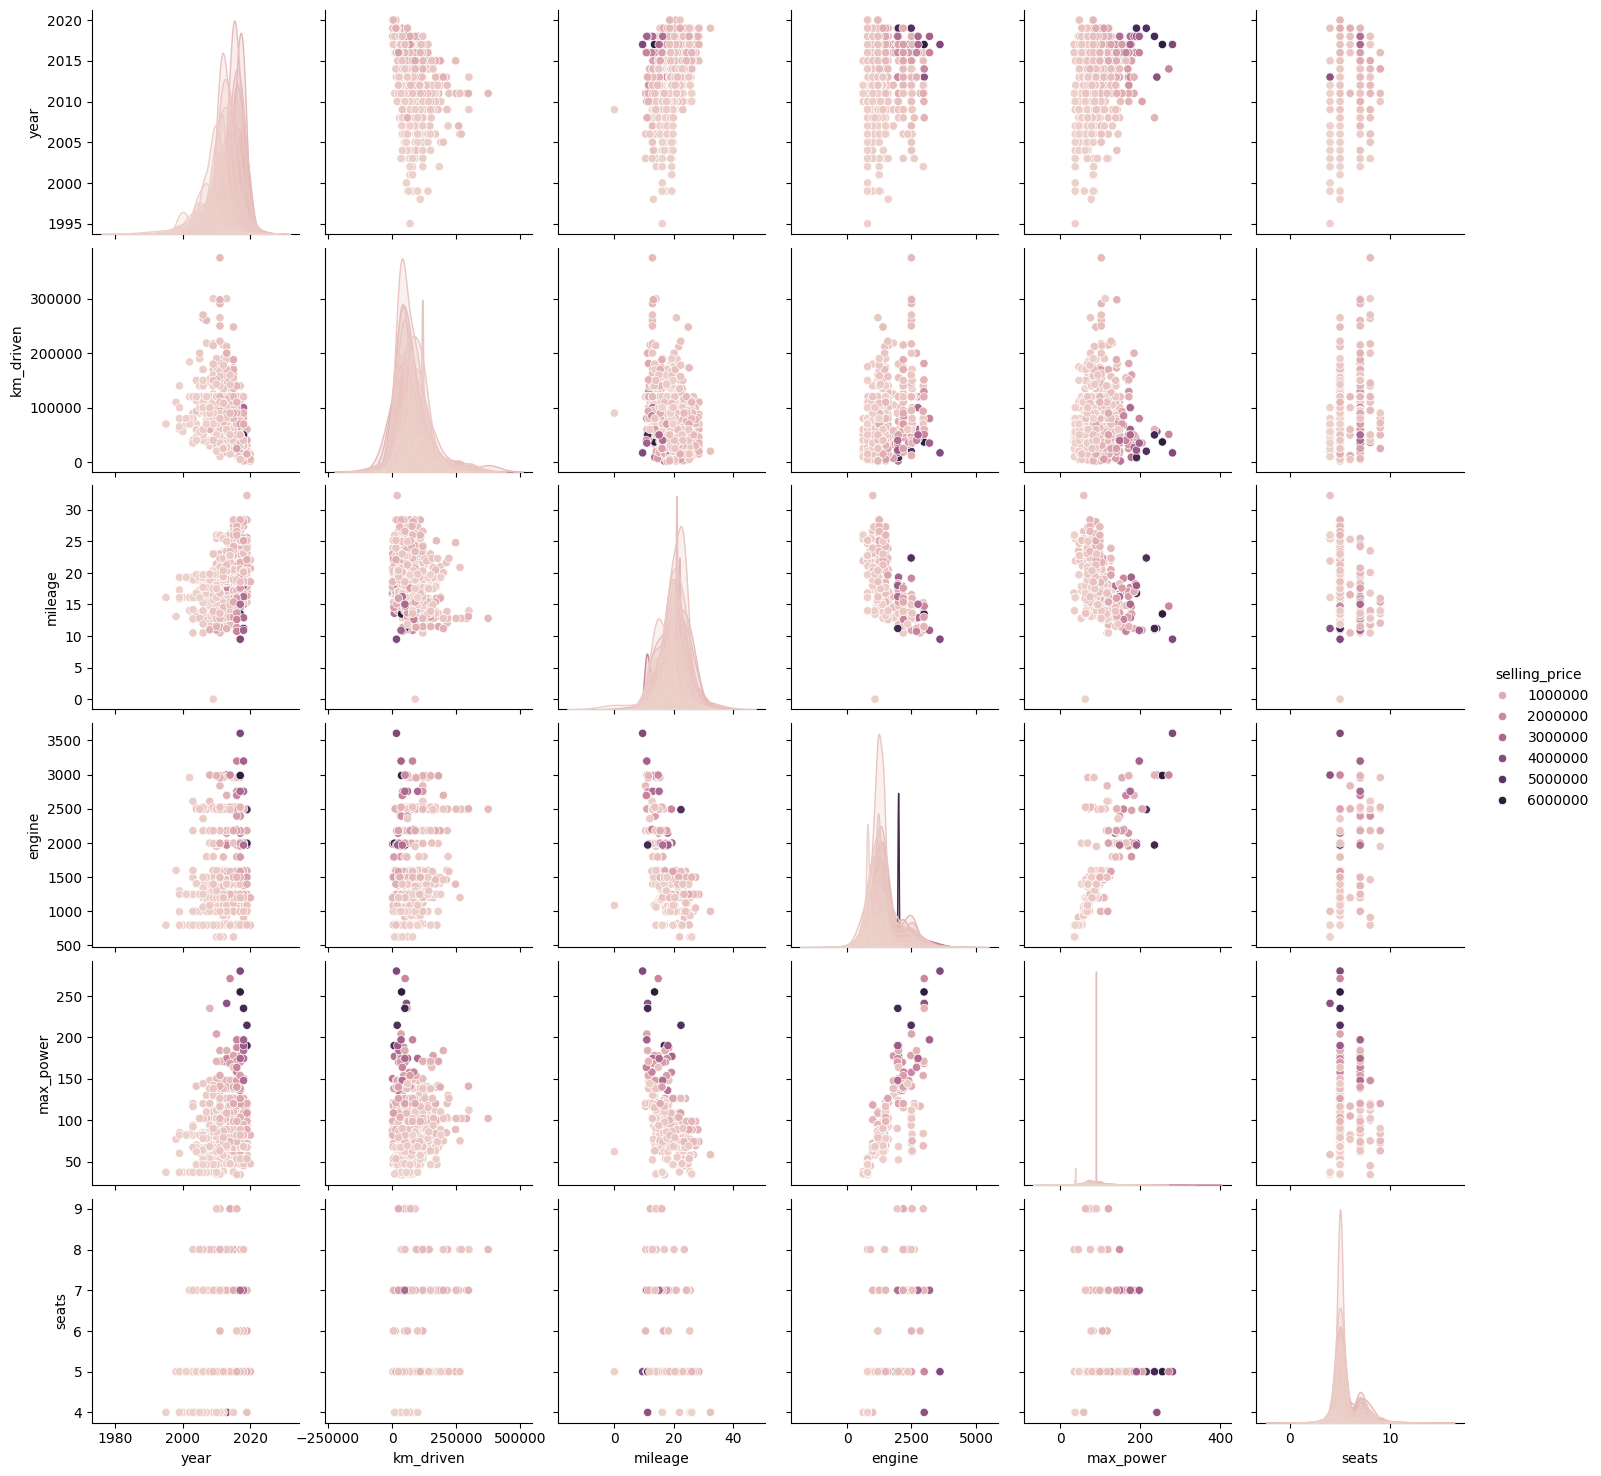

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df[df['split']=='test'], hue='selling_price')

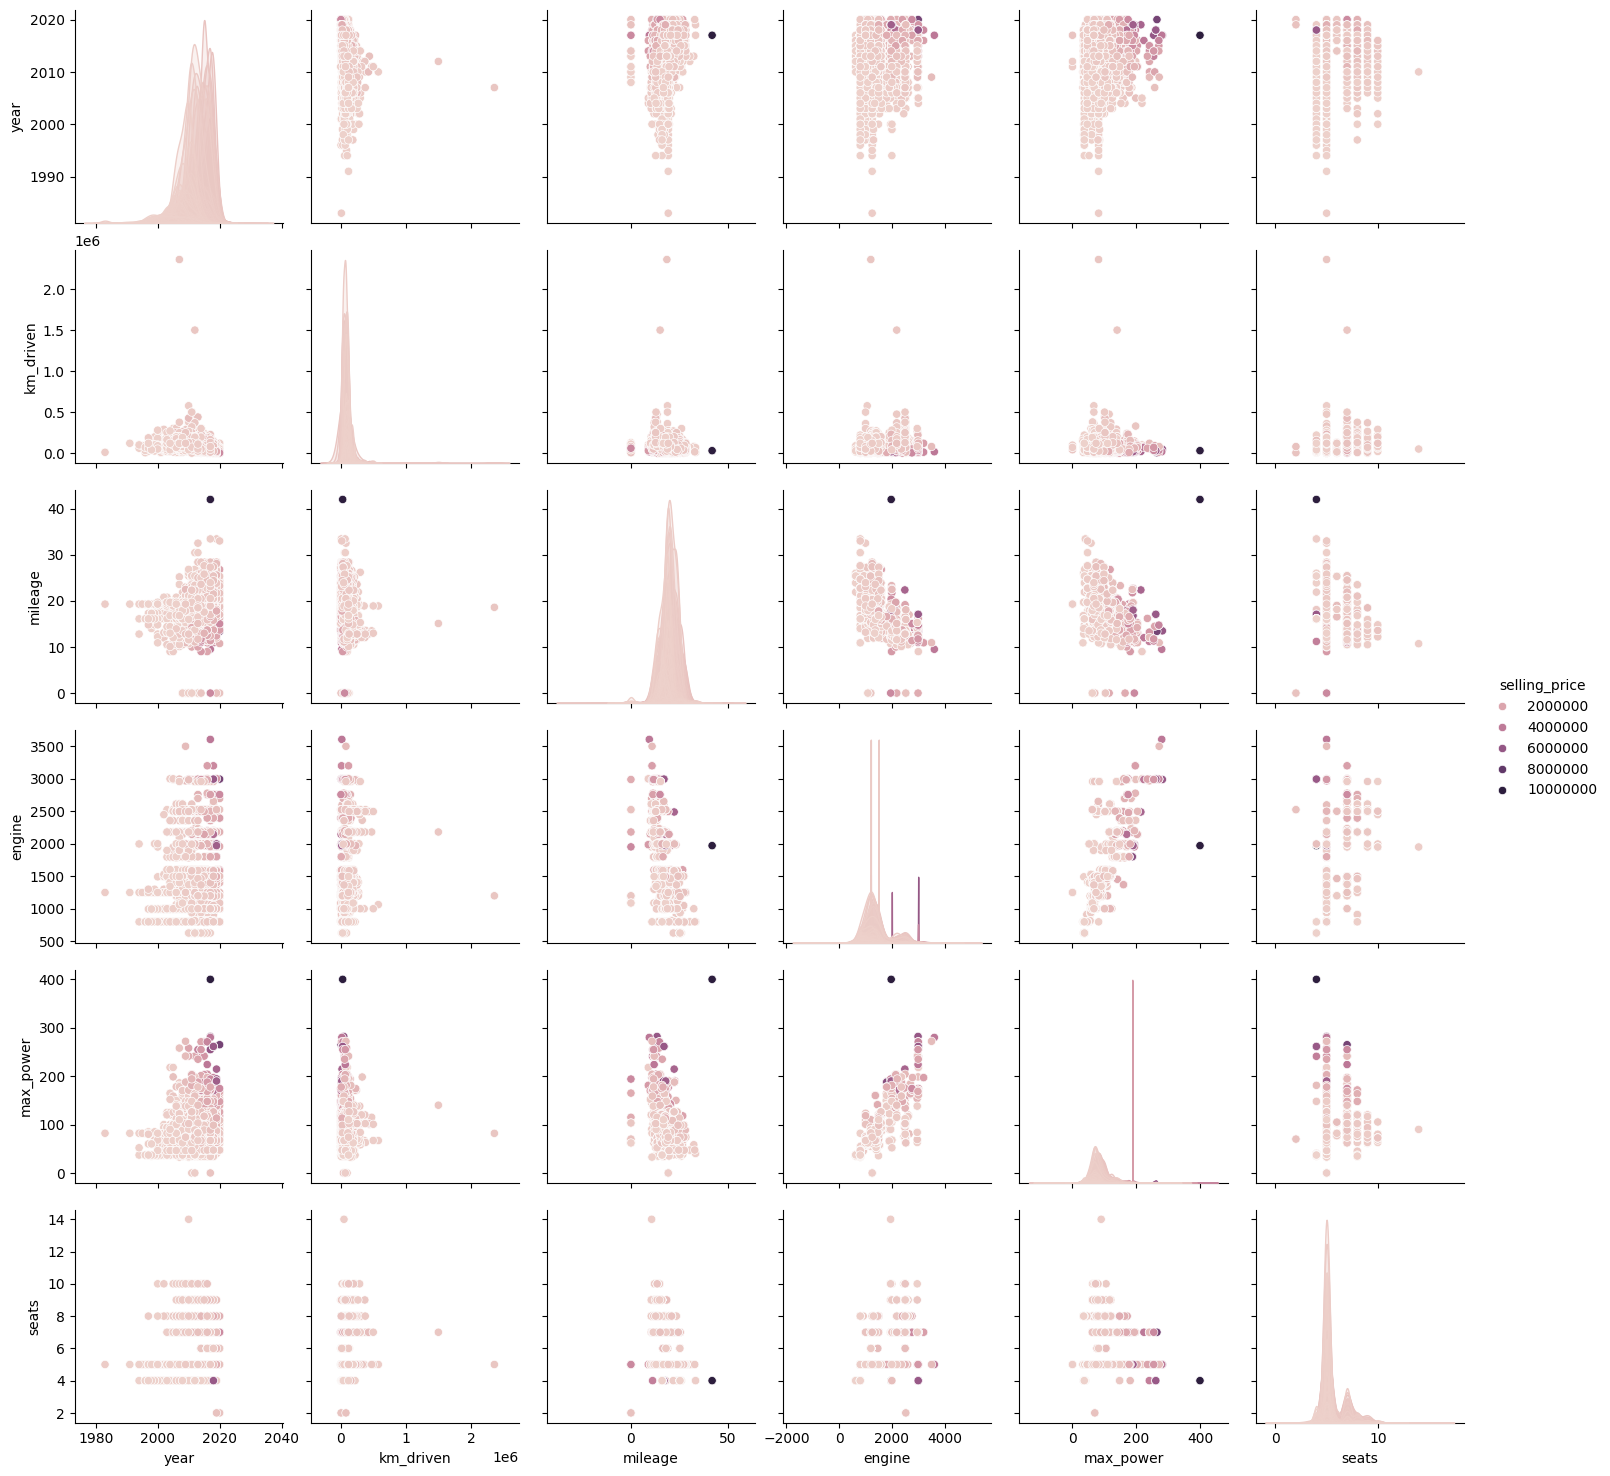

In [68]:
sns.pairplot(df[df['split']=='train'], hue='selling_price')

In [69]:
#Можно ли предположить на основе распределений связь признаков с целевой переменной?
# Да, связь особенно видна на примере max_power и engine; max_power mileage и т.д
#Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?
# Частично да, как пример : engine и max_power


### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


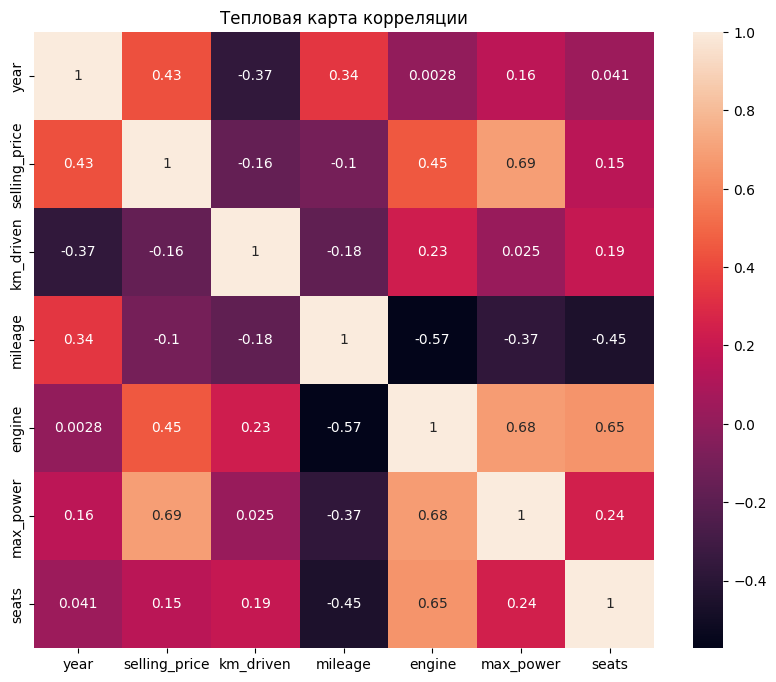

In [71]:
cols=df[df['split']=='train'].select_dtypes(include=[float, int]).columns

plt.figure(figsize=(10, 8))
sns.heatmap(df[df['split']=='train'][cols].corr(), annot=True)
plt.title('Тепловая карта корреляции')
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Ответ: Engine и max_power ( если не считать max_power и selling_price - что является таргетом)
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Ответ: max_power/selling_price, engine/seats, engine/max_power, max_power/engine, seats/engine, selling_price/max_power
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?
 - Ответ: Да, основываясь на отрицательной корреляции можно сделать такой вывод - он достаточно интуитивен, чем старше машина, тем больше км она проедет


`Your answer here`

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [77]:
y_train = df[df['split'] == 'train']["selling_price"]
X_train = df[df['split'] == 'train'].select_dtypes(exclude = object).drop("selling_price",axis=1)

In [78]:
assert X_train.shape == (5840, 6)

In [79]:
y_test = df[df['split'] == 'test']["selling_price"]
X_test = df[df['split'] == 'test'].select_dtypes(exclude = object).drop("selling_price",axis=1)

In [80]:
#assert X_test.shape == (1000, 6)
# Этот тест пройти не удастся, т.к удалял дубликаты также и в тесте - ведь не логично считать метрики на полных дубликатах
df_test.drop_duplicates().shape, df_test.shape

((938, 14), (1000, 14))

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model=LinearRegression()
model.fit(X_train,y_train)

y_train_pred_len=model.predict(X_train)
y_test_pred_len=model.predict(X_test)

print(f'Трейн MSE: {MSE(y_train, y_train_pred_len)}')
print(f'Тест MSE: {MSE(y_test,y_test_pred_len)}')

print(f'Трейн r2: {r2_score(y_train, y_train_pred_len)}')
print(f'Тест r2: {r2_score(y_test,y_test_pred_len)}')

Трейн MSE: 116873067751.52153
Тест MSE: 137676071091.30542
Трейн r2: 0.5922629595849878
Тест r2: 0.6155109420188036


### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

model=LinearRegression()
model.fit(X_train_scaled,y_train)

y_train_pred_stand=model.predict(X_train_scaled)
y_test_pred_stand=model.predict(X_test_scaled)

print(f'Трейн MSE: {MSE(y_train, y_train_pred_stand)}')
print(f'Тест MSE: {MSE(y_test,y_test_pred_stand)}')

print(f'Трейн r2: {r2_score(y_train, y_train_pred_stand)}')
print(f'Тест r2: {r2_score(y_test,y_test_pred_stand)}')

Трейн MSE: 116873067751.52162
Тест MSE: 137676071091.30313
Трейн r2: 0.5922629595849875
Тест r2: 0.6155109420188101


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [86]:
coefficients = model.coef_
feature_importance = pd.Series(coefficients, index=X_train.columns)

In [87]:
feature_importance.sort_values(ascending = False) #Самым информативным оказался max_power

max_power    322779.703236
year         152843.262358
engine        61176.857150
mileage       28781.086595
seats        -23220.570226
km_driven    -44148.047511
dtype: float64

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [89]:
from sklearn.linear_model import Lasso

lasso = Lasso(random_state=42)
lasso.fit(X_train_scaled, y_train)


y_train_pred_lasso=lasso.predict(X_train_scaled)
y_test_pred_lasso=lasso.predict(X_test_scaled)


print(f'Трейн MSE: {MSE(y_train, y_train_pred_lasso)}')
print(f'Тест MSE: {MSE(y_test,y_test_pred_lasso)}')

print(f'Трейн r2: {r2_score(y_train,y_train_pred_lasso)}')
print(f'Тест r2: {r2_score(y_test,y_test_pred_lasso)}')

Трейн MSE: 116873067761.63501
Тест MSE: 137676232385.06992
Трейн r2: 0.5922629595497046
Тест r2: 0.6155104915724255


In [90]:
coefficients = lasso.coef_
feature_importance = pd.Series(coefficients, index=X_train.columns)
feature_importance.sort_values(ascending = False) # Модель не занулила веса с параметрами по умолчанию, возможно потому что все фичи - релевантны, либо параметра alpha = 1 недостаточно для того, чтобы занулить веса

max_power    322780.586197
year         152843.083853
engine        61172.025780
mileage       28779.204085
seats        -23217.693273
km_driven    -44146.918538
dtype: float64

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [92]:
from sklearn.model_selection import GridSearchCV

lasso = Lasso(random_state=42)

param_grid = {'alpha': np.logspace(-3, 5, 20)}

grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=1)
grid_search.fit(X_train_scaled, y_train)

best_alpha = grid_search.best_params_['alpha']
best_model = grid_search.best_estimator_

In [93]:
y_test_pred_lassogrid = best_model.predict(X_test_scaled) # Для дальнейшего задания

In [94]:
print(best_alpha)
best_model

784.7599703514607


Lasso(alpha=784.7599703514607, random_state=42)

In [95]:
# Сколько грид-сёрчу пришлось обучать моделей? - 200;
# Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?
# Нет не занулились.
coefficients = best_model.coef_
coefficients

array([152670.70488452, -43281.2969508 ,  27356.23935061,  57460.25819689,
       323453.42106396, -20978.30520133])

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [97]:
from sklearn.linear_model import ElasticNet

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(random_state=42)

param_grid = {
    'alpha': np.logspace(-3, 5, 20),   # 20 значений от 1e-3 до 1e5
    'l1_ratio': np.linspace(0, 1, 10)  # 10 значений от 0 до 1
}

grid_search = GridSearchCV(
    estimator=elastic_net,
    param_grid=param_grid,
    cv=10,
    scoring='neg_mean_squared_error',
    n_jobs=1
)

# Обучение модели с перебором по сетке
grid_search.fit(X_train_scaled, y_train)
best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']
print(f"alpha: {best_alpha}")
print(f"l1_ratio: {best_l1_ratio}")

C:\Users\ga232\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.544e+14, tolerance: 1.247e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\ga232\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.197e+14, tolerance: 1.564e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

alpha: 0.12742749857031335
l1_ratio: 0.8888888888888888


C:\Users\ga232\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.536e+14, tolerance: 1.507e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [98]:
ElasticNet = ElasticNet(alpha=0.12742749857031335,l1_ratio=0.8888888888888888,random_state=42)
ElasticNet.fit(X_train_scaled, y_train)

y_train_pred_ElasticNet=ElasticNet.predict(X_train_scaled)
y_test_pred_ElasticNet=ElasticNet.predict(X_test_scaled)

train_mse = MSE(y_train, y_train_pred_ElasticNet)
test_mse=MSE(y_test,y_test_pred_ElasticNet)

train_r2 = r2_score(y_train, y_train_pred_ElasticNet)
test_r2=r2_score(y_test,y_test_pred_ElasticNet)

print(f'Трейн MSE: {train_mse}')
print(f'Тест MSE: {test_mse}')
print(f'Трейн r2: {train_r2}')
print(f'Тест r2: {test_r2}')

Трейн MSE: 116903463123.69026
Тест MSE: 138176771228.81467
Трейн r2: 0.5921569187380347
Тест r2: 0.6141126327652346


In [99]:
#Сколько грид-сёрчу пришлось обучать моделей? - 2000
# Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?:
#alpha: 0.12742749857031335
#l1_ratio: 0.8888888888888888

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [102]:
# your code here
df_copy = df.drop("name", axis = 1).copy()

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [104]:
from sklearn.preprocessing import LabelEncoder
# Категорий в name - много, воспользуемся labelEncoder

label_encoder = LabelEncoder()
df['name']=label_encoder.fit_transform(df['name'])

In [106]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,split
0,1299,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,train
1,1598,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5,train
2,776,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,train
3,1341,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,train
4,689,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6766,701,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81,1086,68.05,5,test
6767,733,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.60,1197,81.83,5,test
6768,765,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,test
6769,694,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36,1197,78.90,5,test


### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [108]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

df = pd.get_dummies(df, columns=['fuel','seller_type',	'transmission',	'owner','seats'],drop_first=True)

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [110]:
df[df['split']=='train'].drop("selling_price",axis = 1)

,name,year,km_driven,mileage,engine,max_power,split,fuel_Diesel,fuel_LPG,fuel_Petrol,...,owner_Test Drive Car,owner_Third Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,1299,2014,145500,23.40,1248,74.00,train,True,False,False,...,False,False,False,True,False,False,False,False,False,False
1,1598,2014,120000,21.14,1498,103.52,train,True,False,False,...,False,False,False,True,False,False,False,False,False,False
2,776,2010,127000,23.00,1396,90.00,train,True,False,False,...,False,False,False,True,False,False,False,False,False,False
3,1341,2007,120000,16.10,1298,88.20,train,False,False,True,...,False,False,False,True,False,False,False,False,False,False
4,689,2017,45000,20.14,1197,81.86,train,False,False,True,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,597,2008,191000,17.92,1086,62.10,train,False,False,True,...,False,False,False,True,False,False,False,False,False,False
5836,1400,2013,50000,18.90,998,67.10,train,False,False,True,...,False,False,False,True,False,False,False,False,False,False
5837,766,2013,110000,18.50,1197,82.85,train,False,False,True,...,False,False,False,True,False,False,False,False,False,False
5838,652,2007,119000,16.80,1493,110.00,train,True,False,False,...,False,False,False,True,False,False,False,False,False,False


In [111]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
Ridge_net = Ridge(random_state=42)

param_grid = {
    'alpha': np.logspace(-3, 5, 20),   # 20 значений от 1e-3 до 1e5
}

grid_search = GridSearchCV(
    estimator=Ridge_net,
    param_grid=param_grid,
    cv=10,
    scoring='neg_mean_squared_error',
    n_jobs=1
)

# Обучение модели с перебором по сетке
grid_search.fit(
    df[df['split']=='train'].drop(["selling_price",'split'],axis = 1),
    df[df['split']=='train']['selling_price'],
)
best_alpha = grid_search.best_params_['alpha']
print(f"alpha: {best_alpha}")

C:\Users\ga232\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=5.05408e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


alpha: 6.158482110660261


In [112]:
Ridge_net = Ridge(alpha=6.158482110660261,random_state=42)
Ridge_net.fit(
    df[df['split']=='train'].drop(["selling_price",'split'],axis = 1),
    df[df['split']=='train']['selling_price'],
)


y_train_pred_Ridge_net = Ridge_net.predict(df[df['split']=='train'].drop(["selling_price",'split'],axis = 1))
y_test_pred_Ridge_net = Ridge_net.predict(df[df['split']=='test'].drop(["selling_price",'split'],axis = 1))

train_mse = MSE(df[df['split']=='train']['selling_price'], y_train_pred_Ridge_net)
test_mse = MSE(df[df['split']=='test']['selling_price'],y_test_pred_Ridge_net)

train_r2 = r2_score(df[df['split']=='train']['selling_price'], y_train_pred_Ridge_net)
test_r2=r2_score(df[df['split']=='test']['selling_price'],y_test_pred_Ridge_net)

print(f'Трейн MSE: {train_mse}')
print(f'Тест MSE: {test_mse}')
print(f'Трейн r2: {train_r2}')
print(f'Тест r2: {test_r2}')

Трейн MSE: 98098954801.26733
Тест MSE: 122181500497.11986
Трейн r2: 0.657760523720367
Тест r2: 0.6587827524674805


# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [114]:
def business_metric(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    relative_error = np.abs(y_pred - y_true) / y_true
    successful_predictions = np.sum(relative_error <= 0.10)
    total_predictions = len(y_true)
    business_metric = successful_predictions / total_predictions
    return business_metric


business_metric(df[df['split']=='test']['selling_price'],y_test_pred_len)

0.23523093447905477

In [115]:
business_metric(df[df['split']=='test']['selling_price'],y_test_pred_stand)

0.23523093447905477

In [116]:
business_metric(df[df['split']=='test']['selling_price'],y_test_pred_lasso)

0.23523093447905477

In [117]:
business_metric(df[df['split']=='test']['selling_price'],y_test_pred_lassogrid)

0.23200859291084855

In [118]:
business_metric(df[df['split']=='test']['selling_price'],y_test_pred_ElasticNet)

0.23093447905477982

In [119]:
business_metric(df[df['split']=='test']['selling_price'],y_test_pred_Ridge_net)

0.24060150375939848

In [120]:
#Лучше всего справилась модель ridge

`Your answer here`

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [438]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List
import pandas as pd
import pickle

app = FastAPI()


with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float

class Items(BaseModel):
    objects: List[Item]

def preprocess_input(data: pd.DataFrame) -> pd.DataFrame:

    # Создал базовый пример состоящий из медианных значений, который будет заполняться на основе входных json, таким образом если что-либо в json'е будет Nan, оно будет автоматически заполнено
    base_example = {'year': 2014.0,
     'km_driven': 70000.0,
     'mileage': 19.3,
     'engine': 1248.0,
     'max_power': 82.0,
     'fuel_Diesel': 0.0,
     'fuel_LPG': 0.0,
     'fuel_Petrol': 0.0,
     'seller_type_Individual': 0.0,
     'seller_type_Trustmark Dealer': 0.0,
     'transmission_Manual': 0.0,
     'owner_Fourth & Above Owner': 0.0,
     'owner_Second Owner': 0.0,
     'owner_Test Drive Car': 0.0,
     'owner_Third Owner': 0.0,
     'seats_4': 0.0,
     'seats_5': 0.0,
     'seats_6': 0.0,
     'seats_7': 0.0,
     'seats_8': 0.0,
     'seats_9': 0.0,
     'seats_10': 0.0,
     'seats_14': 0.0}
    
    data = data.fillna('Nan')
    df_processed = pd.DataFrame([base_example for i in range(len(data))])
    for i in range(len(data)):
        
        df_processed.loc[i,'year'] = data.loc[i,'year']
        df_processed.loc[i,'km_driven'] = data.loc[i,'km_driven']
        df_processed.loc[i,'engine'] = data.loc[i,'km_driven']
        df_processed.loc[i,'max_power'] = data.loc[i,'km_driven']

        # Если колонка не пропущенна и не является значением дропунтым при one-hot кодировании - оно получит 1 
        if data.loc[i,'fuel'] not in ['CNG','Nan']:
            df_processed.loc[i,f'fuel_{data.loc[i,'fuel']}'] = 1
    
        if data.loc[i,'seller_type'] not in ['Dealer',"Nan"]:
            df_processed.loc[i,f'seller_type_{data.loc[i,'seller_type']}'] = 1
    
        if data.loc[i,'transmission'] not in ['Automatic',"Nan"]:
            data.loc[i,f'transmission_{data.loc[i,'transmission']}'] = 1
        
        if data.loc[i,'owner'] not in ['First Owner' ,"Nan"]:
            data.loc[i,f'owner_{data.loc[i,'owner']}'] = 1
    
        if data.loc[i,'seats'] not in [2.0,"Nan"] :
            data.loc[i,f'seats_{int(data.loc[i,'seats'])}'] =1
            
    return df_processed

@app.post("/predict_item")
def predict_item(item: Item) -> float:

    df = pd.DataFrame([item.dict()])

    df_processed = preprocess_input(df)

    prediction = model.predict(df_processed)

    return float(prediction[0])

@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:

    df = pd.DataFrame([item.dict() for item in items])

    df_processed = preprocess_input(df)

    predictions = model.predict(df_processed)

    return predictions.tolist()


In [432]:
# Переобучил модель, избавился от колонки name, чтобы не хранить всё её label-encoded значения на инференсе . Прогнал часть функций, в частности предобработку, сохранил модель

Ridge_net = Ridge(alpha=6.158482110660261,random_state=42)
Ridge_net.fit(
    df[df['split']=='train'].drop(["selling_price",'split','name'],axis = 1),
    df[df['split']=='train']['selling_price'],
)
# Валидирую функцию preprocess_input

Ridge_net.predict(preprocess_input(df_test.drop(["name","selling_price", "split"], axis=1)))


array([1.54124969e+09, 2.29520968e+08, 2.00406782e+09, 1.58730464e+09,
       6.42108834e+08, 1.15790732e+08, 3.20994183e+08, 6.42145119e+08,
       6.60458243e+08, 5.32249925e+08, 4.49750156e+08, 1.83774220e+08,
       2.25043939e+08, 1.00902444e+09, 8.73295015e+07, 1.56067214e+08,
       2.29355994e+08, 1.69729223e+09, 5.70765318e+08, 3.20994183e+08,
       6.42164953e+08, 1.65129002e+09, 6.79008910e+08, 1.83518758e+08,
       3.67141532e+08, 9.22992048e+08, 3.67141532e+08, 1.28453939e+09,
       5.50526764e+08, 7.34093420e+08, 4.60994510e+07, 4.58888576e+08,
       1.26608113e+09, 5.50434361e+08, 1.37617758e+09, 1.10091662e+09,
       2.29537418e+08, 8.25695324e+08, 3.39526484e+08, 1.01093027e+08,
       9.17442367e+08, 4.12906200e+08, 5.50361791e+08, 6.97322033e+08,
       1.00934658e+09, 1.23855702e+09, 1.46788834e+09, 8.62265453e+08,
       5.06306843e+07, 4.60433321e+07, 5.68820054e+08, 7.33819592e+08,
       2.75467059e+08, 8.25767894e+08, 8.07289797e+08, 1.83627612e+08,
      

In [436]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(Ridge_net, file)

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>

